# **Fraud Detectio Project**

### Importing Necassary Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split

In [13]:
# Outside Code

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
#from termcolor import colored as cl  # For the text customization
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics, model_selection
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    f1_score,
)

ATTRS = ["bold"]
COLOR = "blue"

In [14]:
df = pd.read_csv("fraud_data.csv", na_values='?')
df = df.dropna()

### Acquiring & splitting data into test, validation & training sets.

In [15]:
y = np.array(df['Class'])
X = np.array(df.loc[:, df.columns != 'Class'])
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=10, shuffle=True)

### Correlation Matrix Between Features Using HeatMap

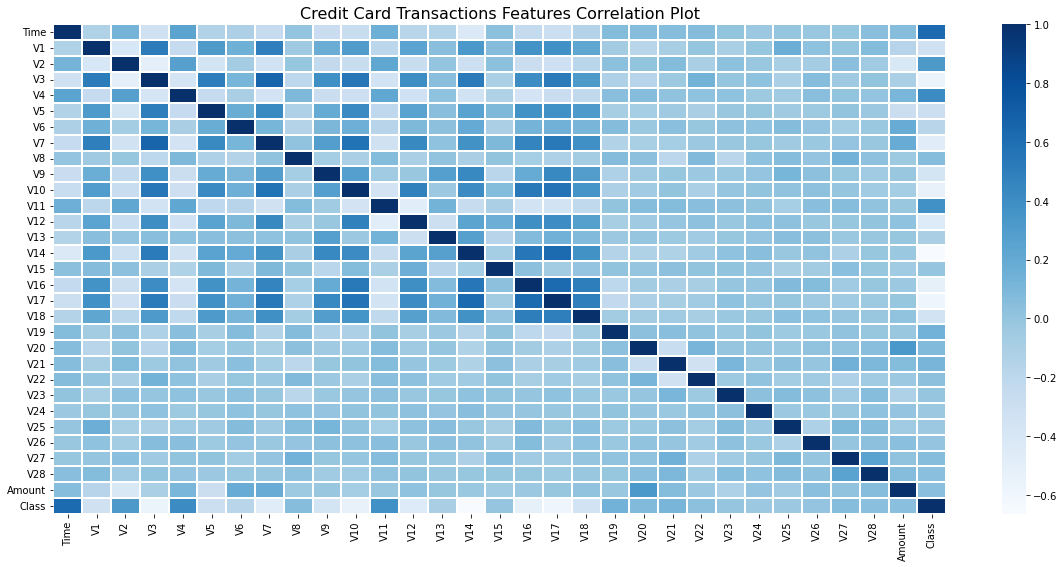

In [16]:
correlation = df.corr()
correlation["Class"].sort_values(ascending=False)
plt.figure(figsize=(20, 9))
plt.title("Credit Card Transactions Features Correlation Plot", fontsize=16)
sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    linewidth=2,
    cmap="Blues",
    cbar=True,
)
plt.show()

### Eliminating features whose correlation value is greater than 0.7. 

In [19]:
columns = list(df.columns)
for column in columns:
    # Skip Class column
    if column == "Class":
        continue
    filtered_columns = [column]
    # Iterate through HeatMap
    for col in df.columns:
        # Skip the diagonals and the class columns
        if (column == col) | (column == "Class"):
            continue
        # Retrieving corr val from df
        cor_val = df[column].corr(df[col])
        # Setting threshold to be 70%
        if cor_val > 0.7:
            columns.remove(col)
            continue
        else:
            filtered_columns.append(col)
    # Keeping only filtered columns
    df = df[filtered_columns]

features = df.drop(["Class"], axis=1)
# We are gonig to scale the featrues with MinMax Scaler
scaler = MinMaxScaler((0, 1))
X = scaler.fit_transform(features)

# Using Chi Squared to 
selector = SelectKBest(chi2, k=21)
selector.fit(X, df["Class"])
filtered_columns = selector.get_support()

filtered_data = features.loc[:, filtered_columns]
df = filtered_data.join(df["Class"])